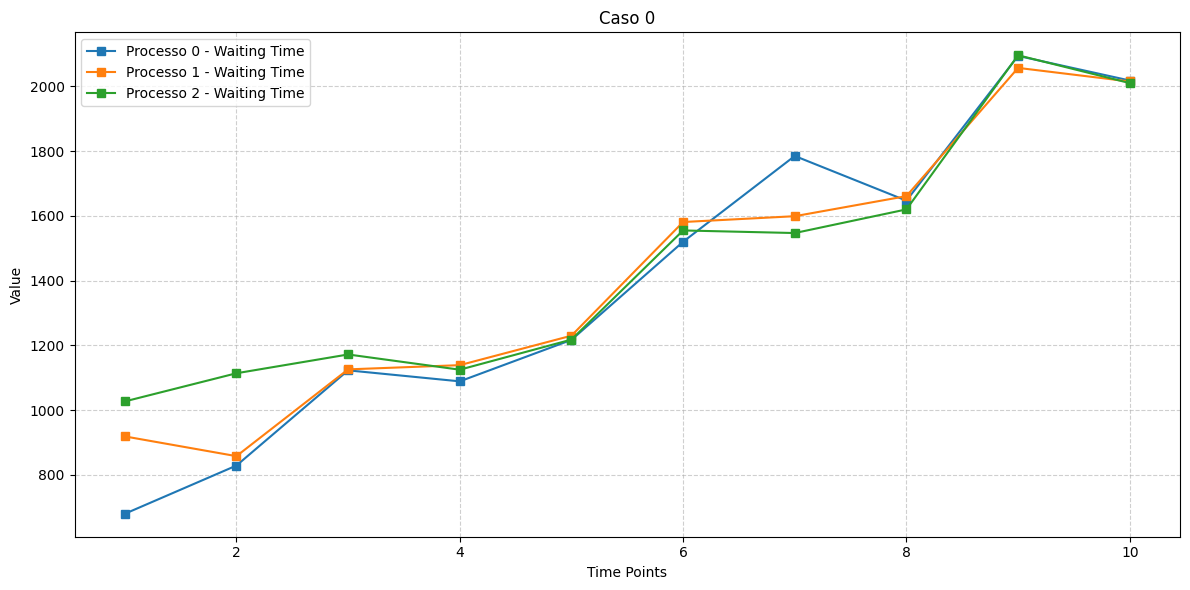

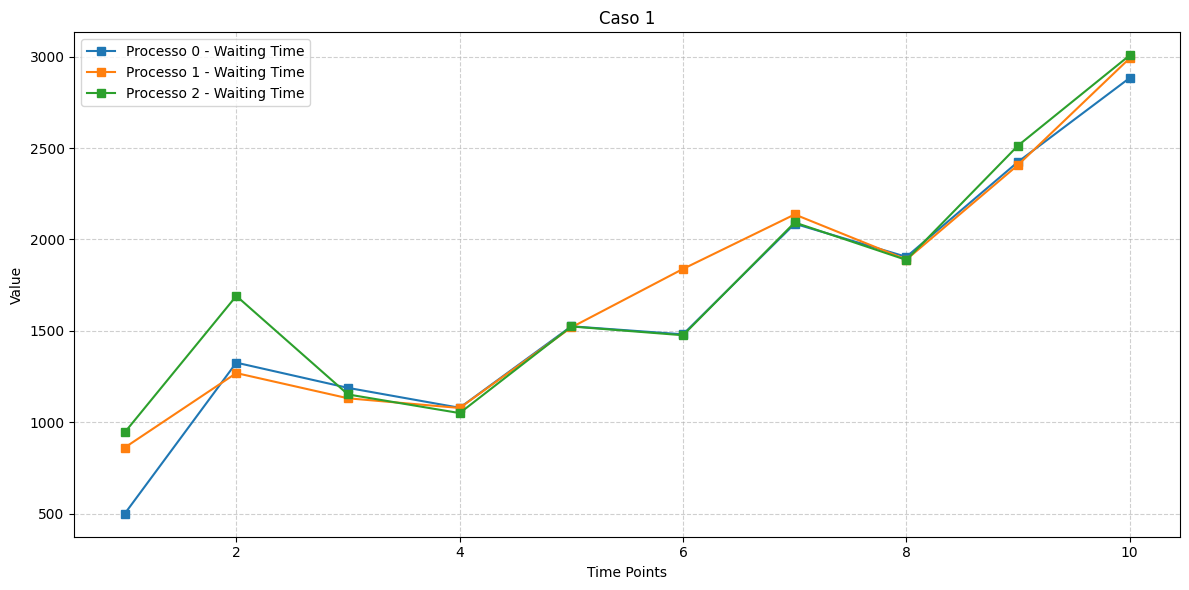

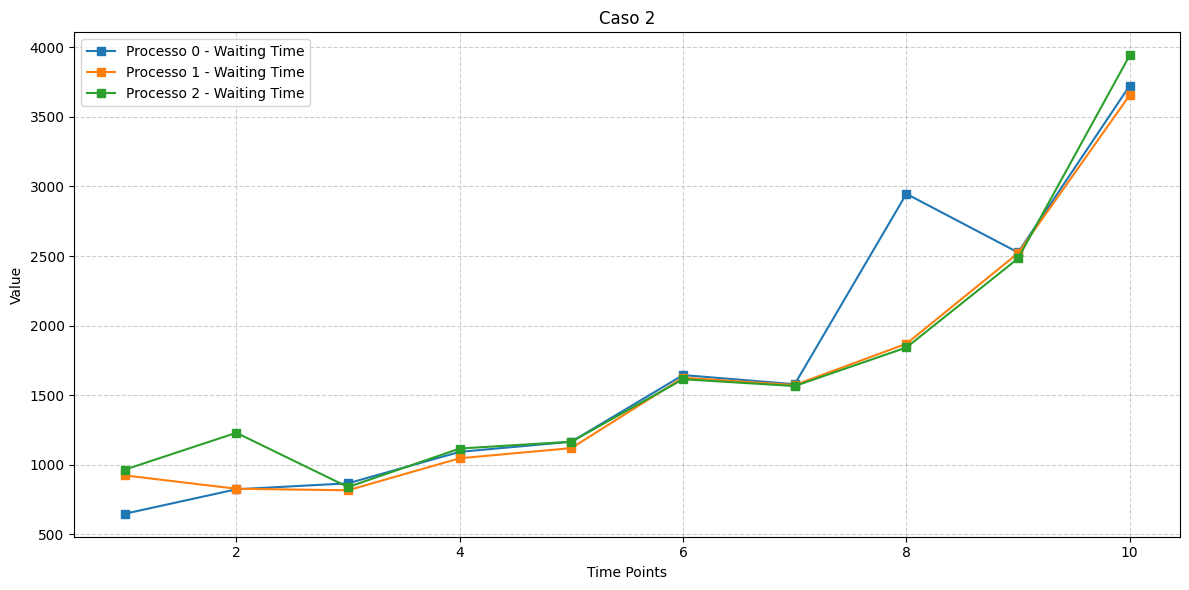

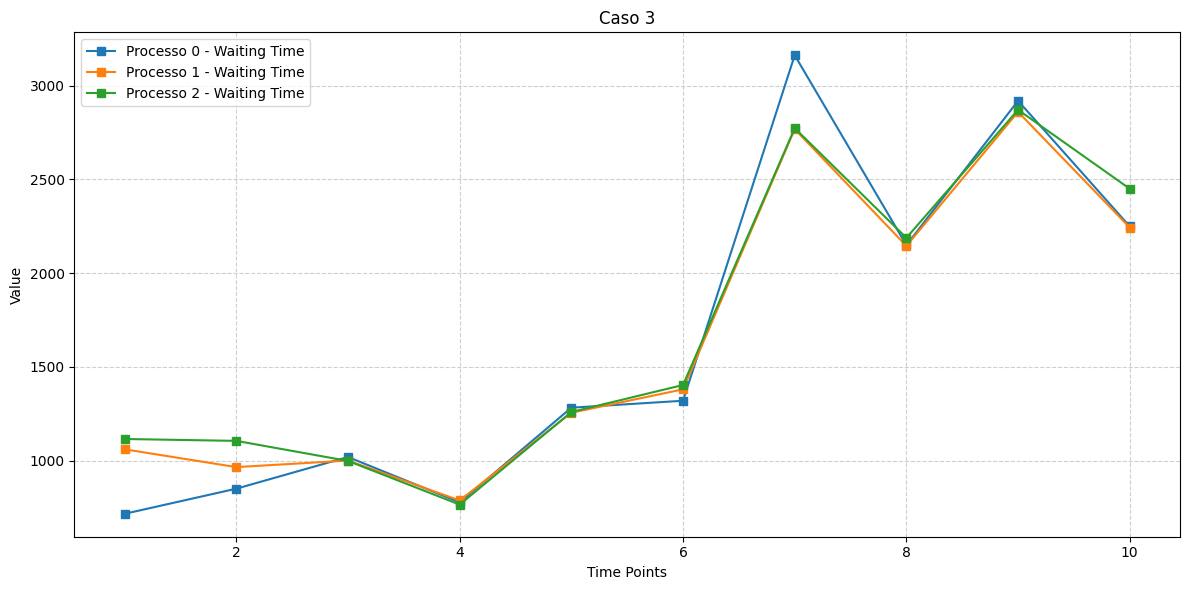

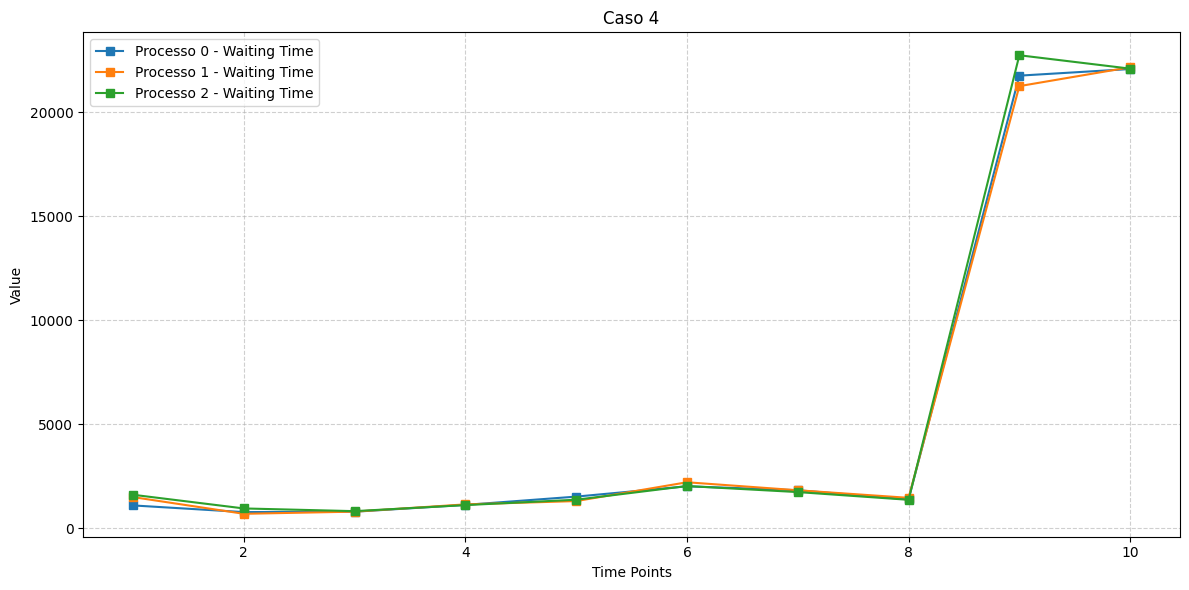

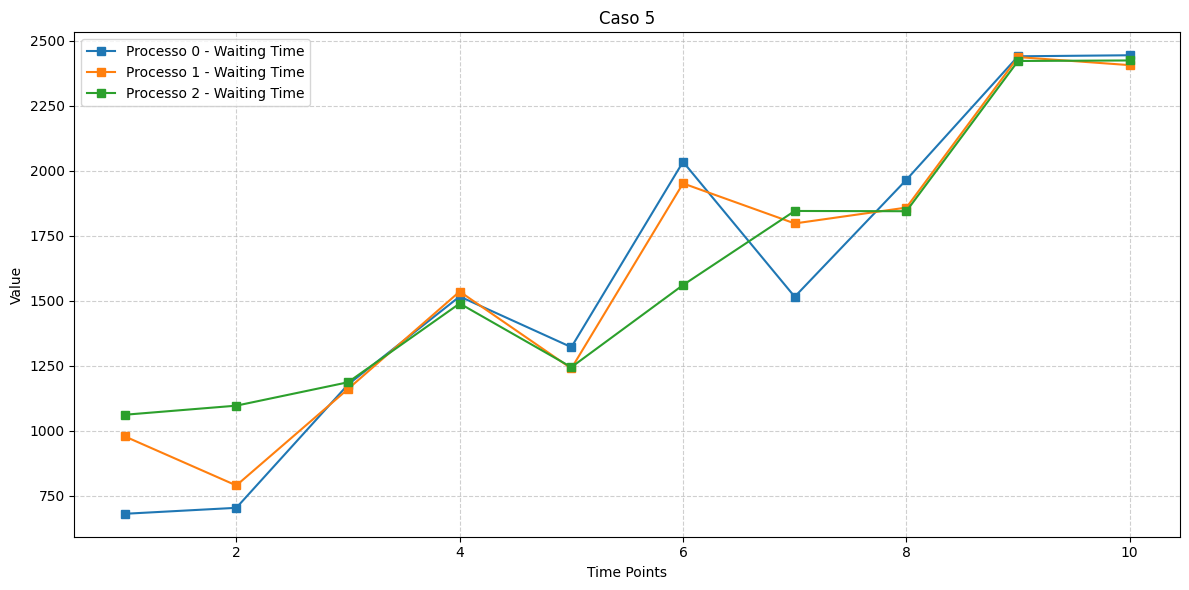

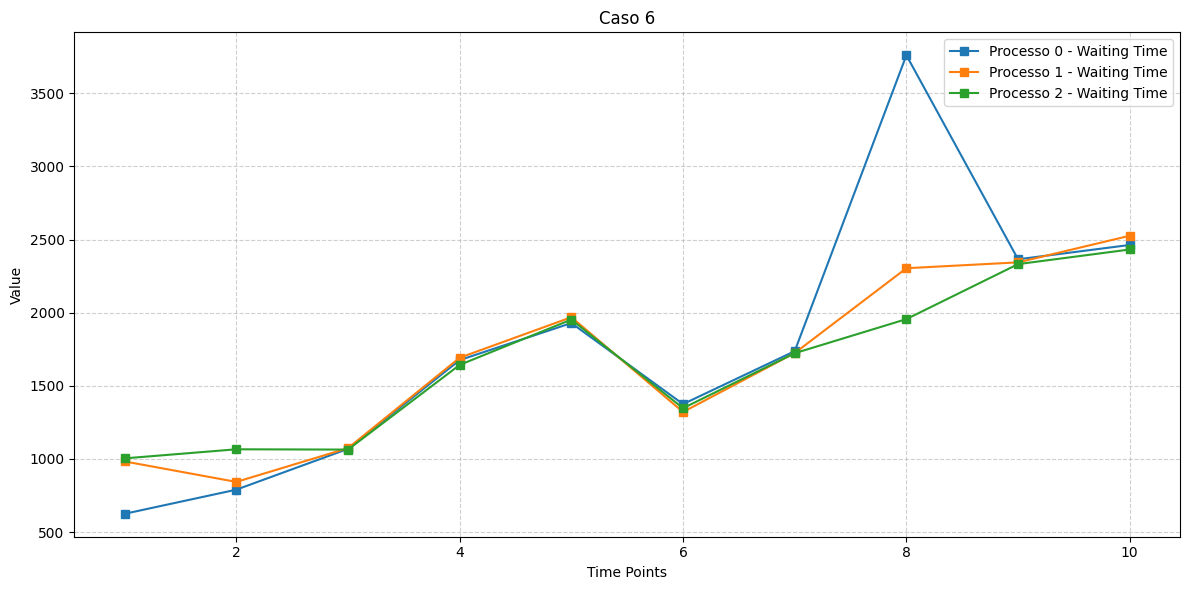

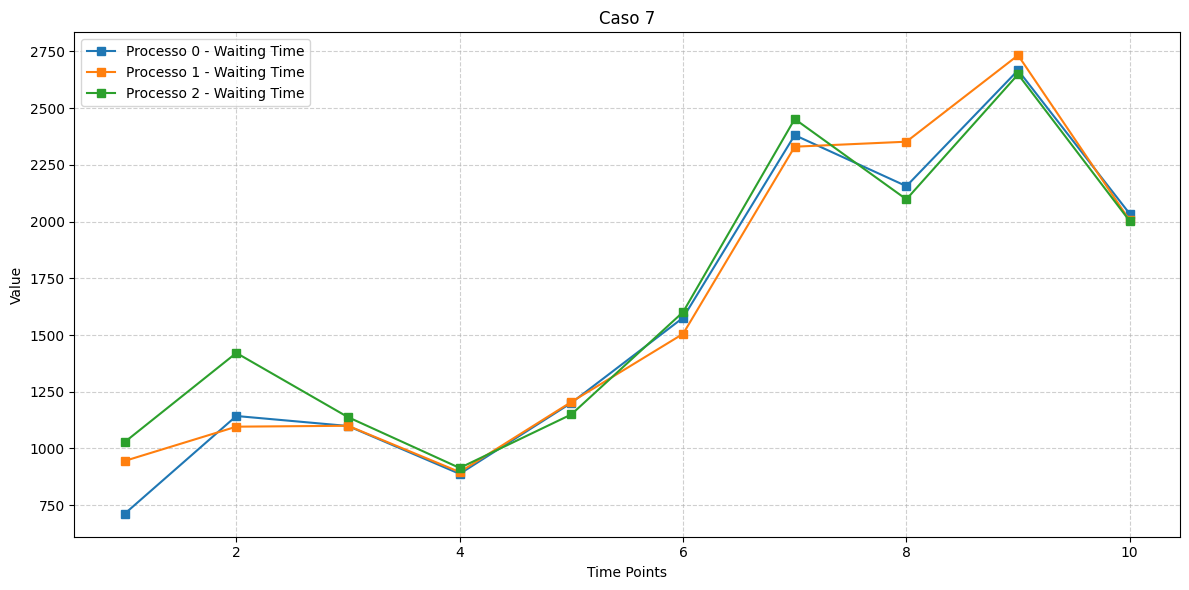

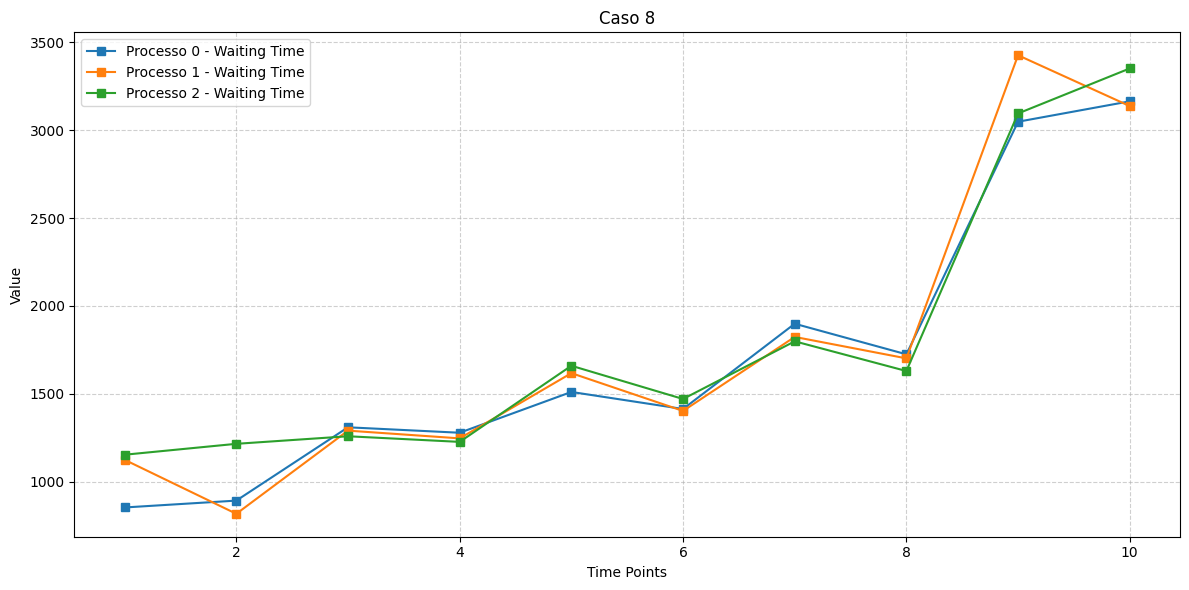

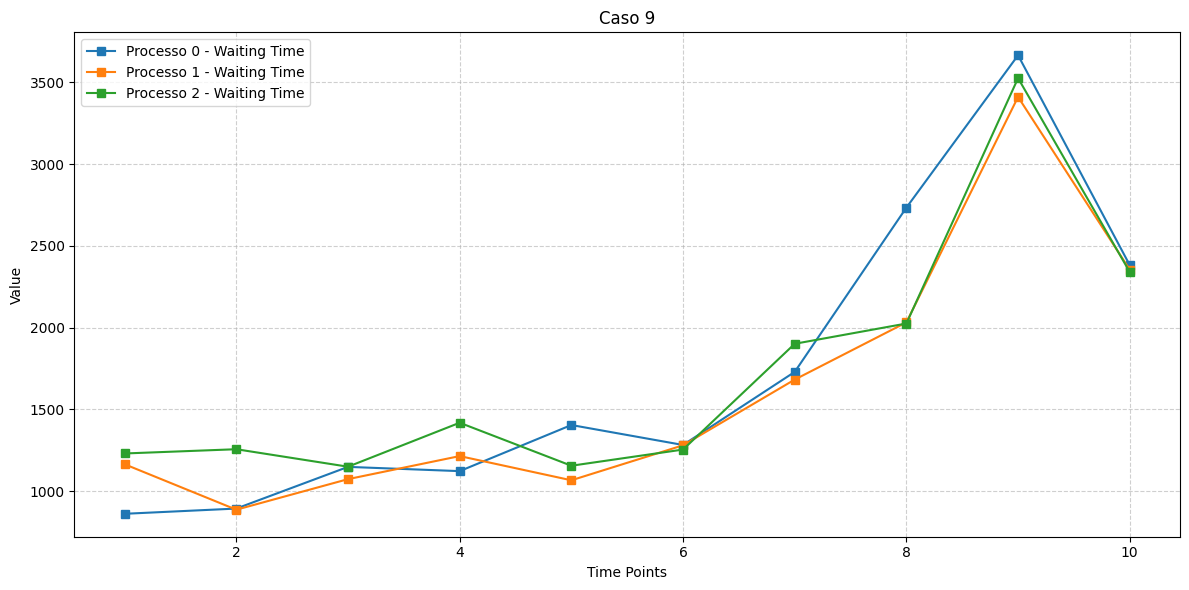

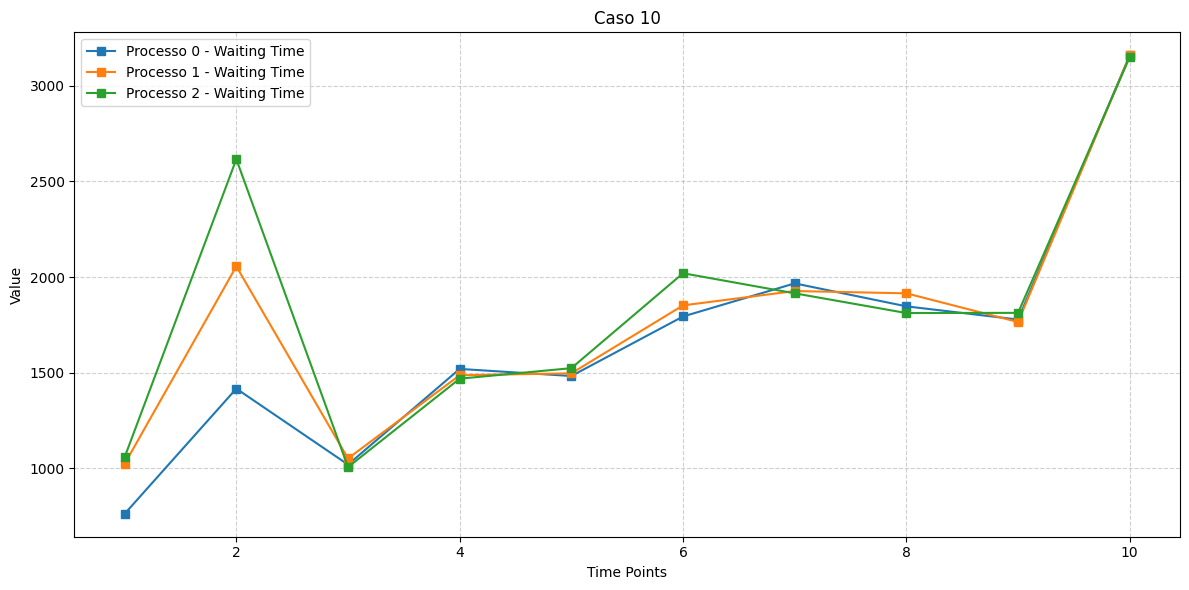

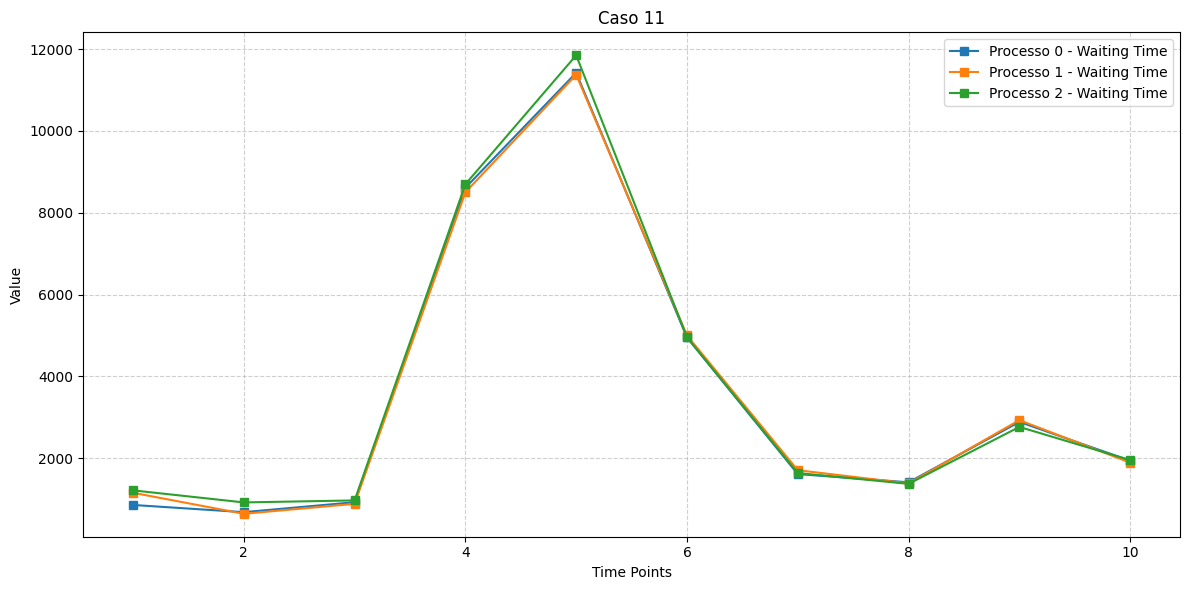

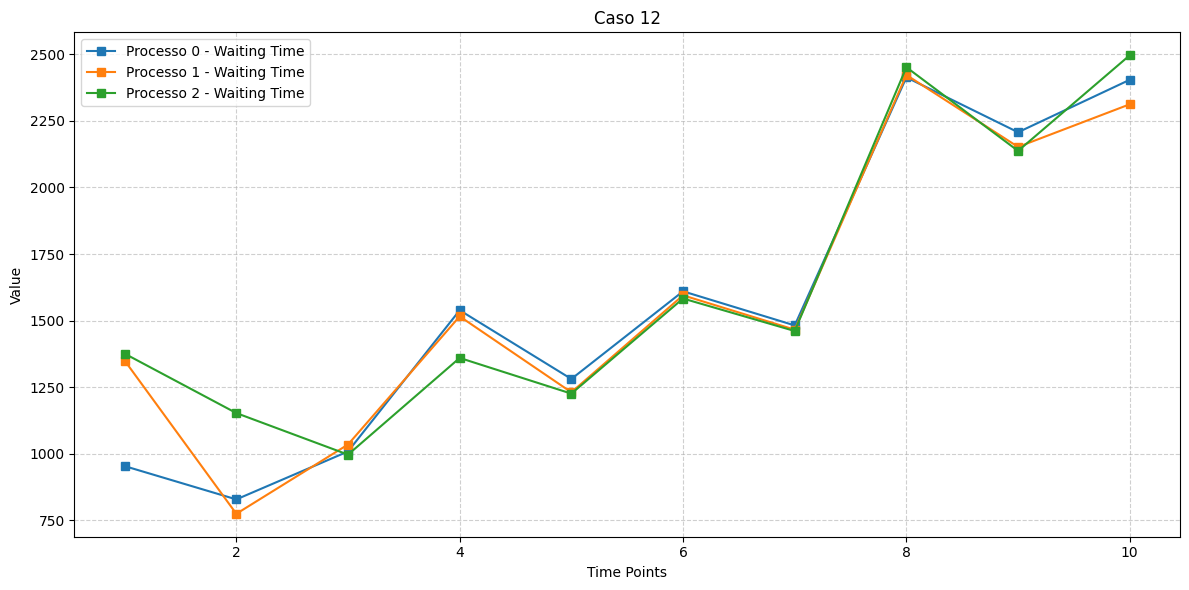

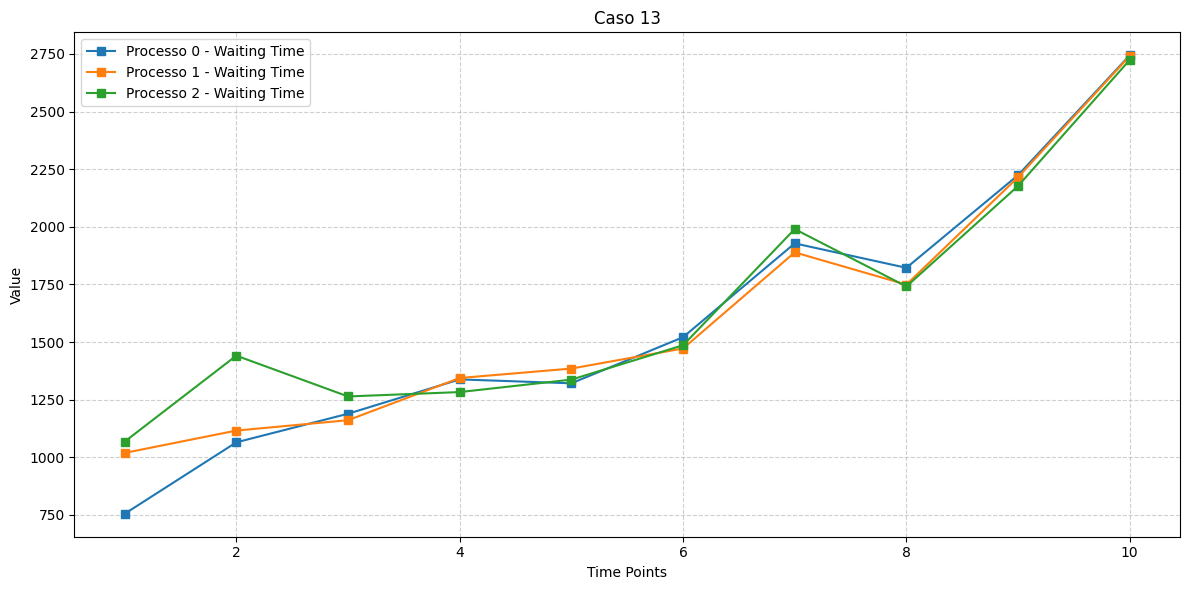

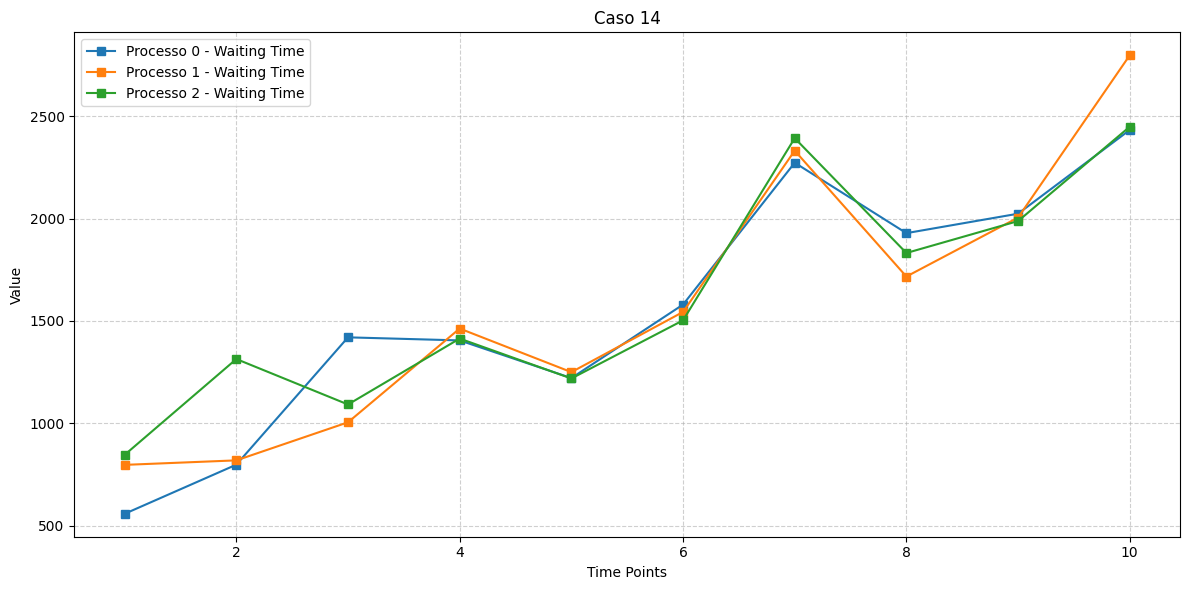

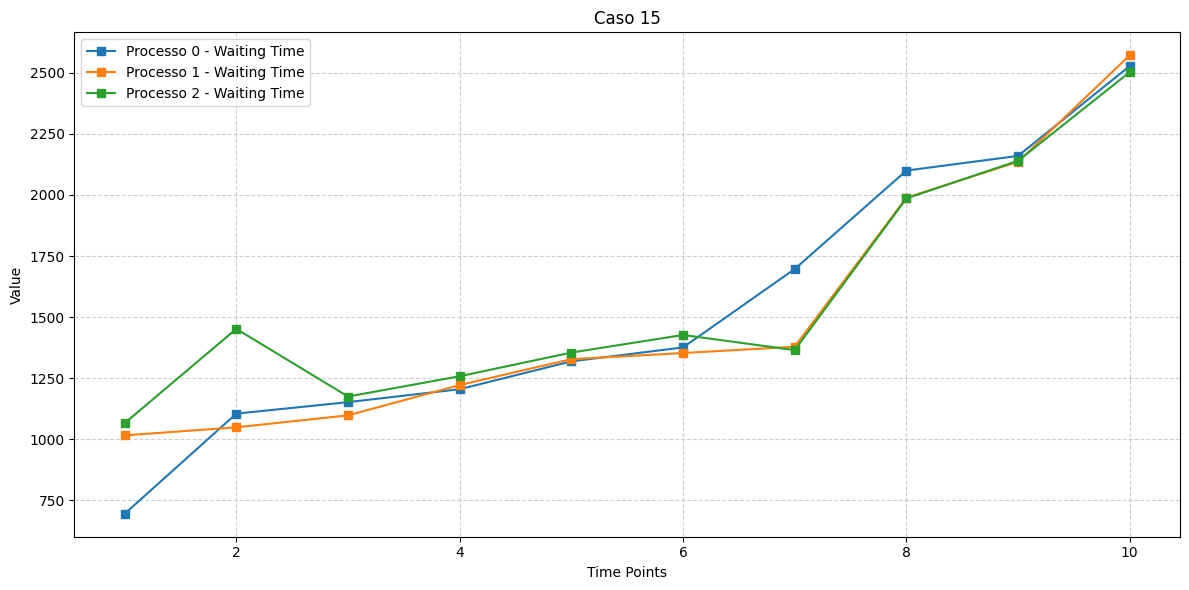

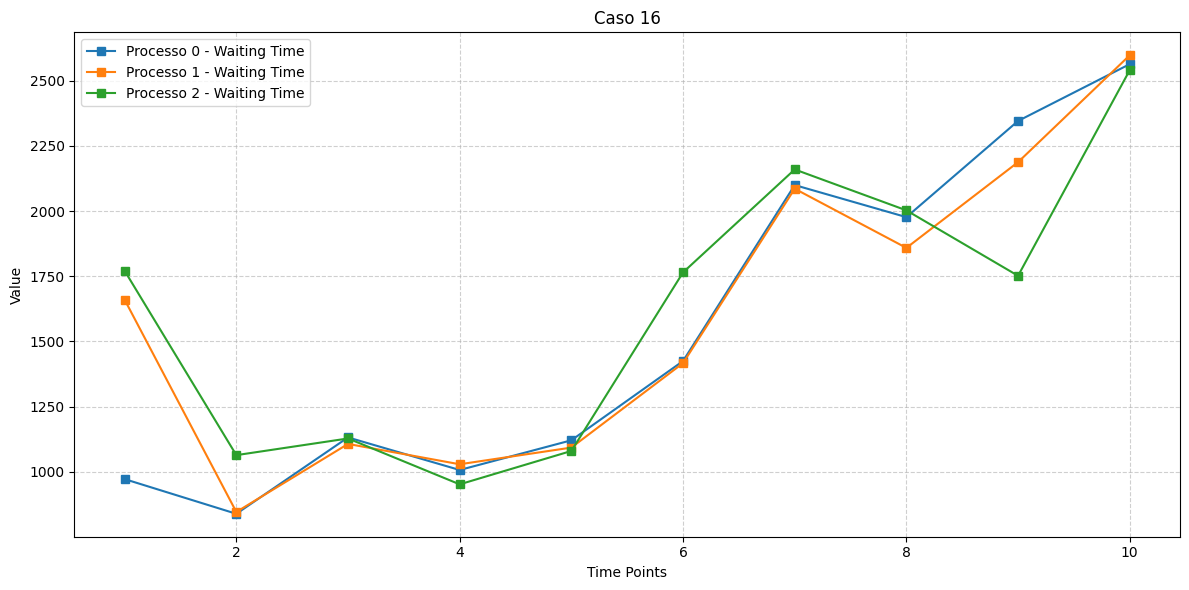

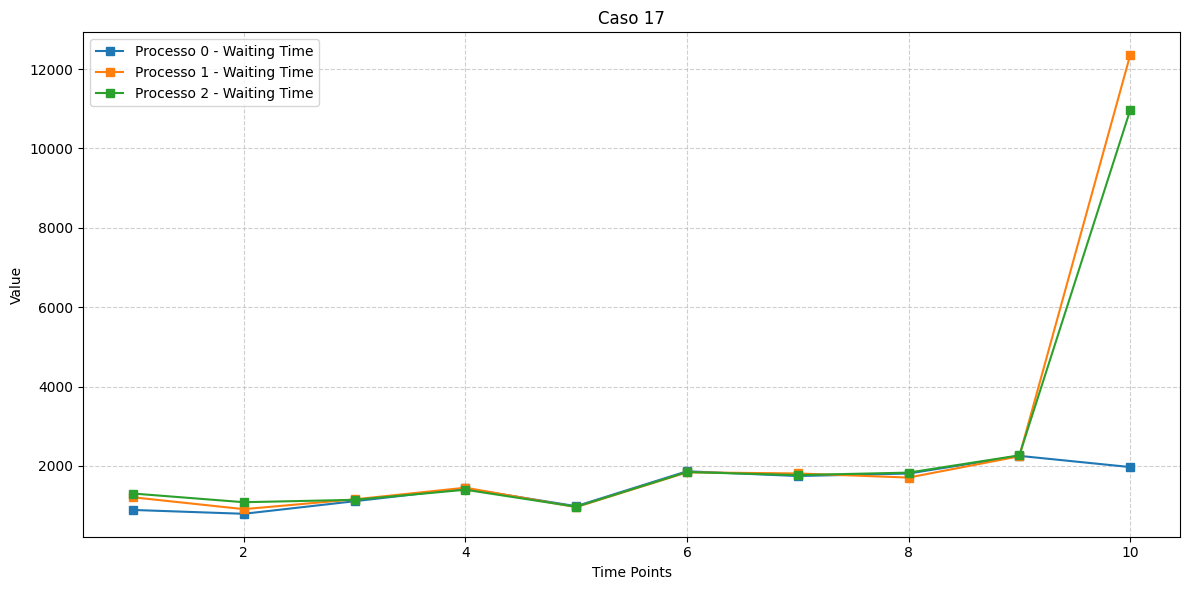

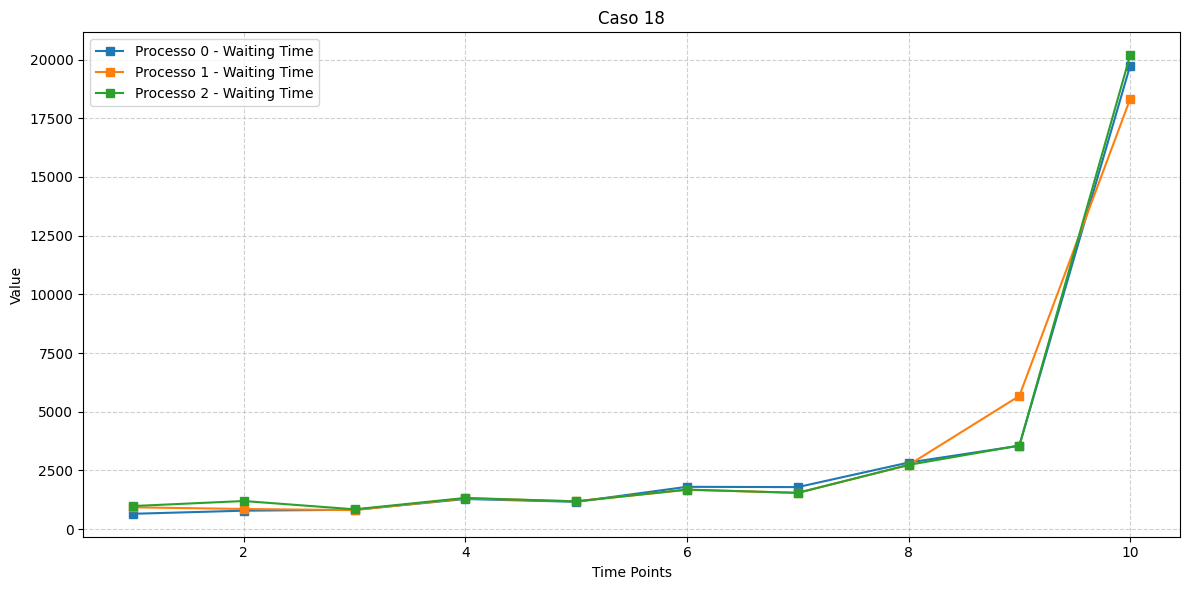

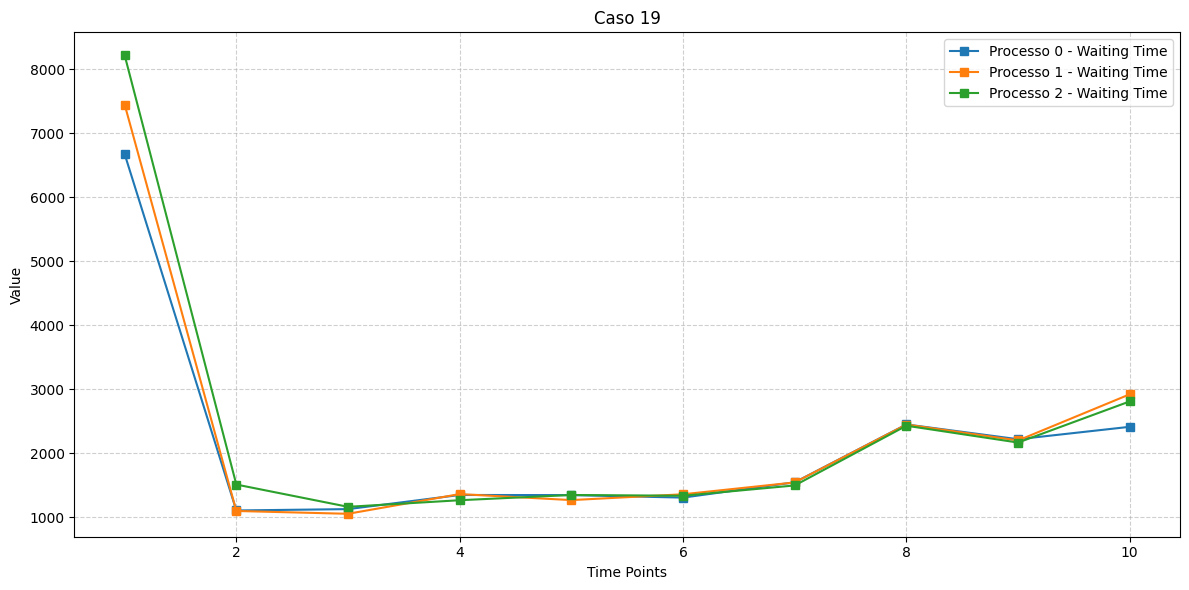

In [7]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict

def extract_values(file_path):
    data = defaultdict(lambda: {"cpu_times": [], "waiting_times": [], "timestamps": []})

    with open(file_path, 'r') as file:
        content = file.read()

    # Define the regex pattern to extract values
    pattern = r"Processo:\s*(\d+)\nCpu time:\s*(\d+)\nWaiting time:\s*(\d+)\nTimestamp:\s*(\d+)"

    # Find all matches in the content
    matches = re.findall(pattern, content)

    # Aggregate values for each Processo
    for match in matches:
        processo = int(match[0])
        data[processo]["cpu_times"].append(int(match[1]))
        data[processo]["waiting_times"].append(int(match[2]))
        data[processo]["timestamps"].append(int(match[3]))

    return data

def plot_lines(data, title):
    # Set the figure size (increase the width)
    plt.figure(figsize=(12, 6))  # 12 is the width, 6 is the height

    for processo, values in data.items():
        time_points = [i + 1 for i in range(len(values["cpu_times"]))]

        # plt.plot(time_points, values["cpu_times"], label=f"Processo {processo} - CPU Time", marker='o')
        plt.plot(time_points, values["waiting_times"], label=f"Processo {processo} - Waiting Time", marker='s')
        # plt.plot(time_points, values["timestamps"], label=f"Processo {processo} - Timestamp", marker='^')

    plt.xlabel("Time Points")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example usage

for i in range(0, 20):
    file_path = f"data_folder/data{i}.txt"  # Replace with the actual file path
    values = extract_values(file_path)
    plot_lines(values, f"Caso {i}")



defaultdict(<function process_all_files.<locals>.<lambda> at 0x7fe1ed8d8a40>, {})


/tmp/ipykernel_4896/3938859767.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


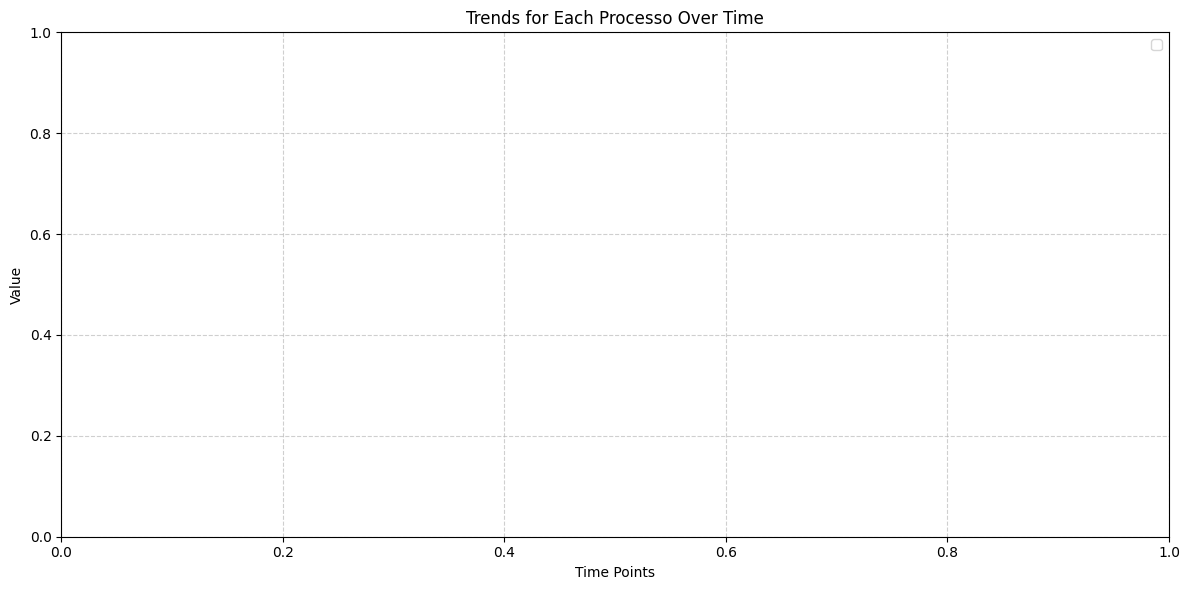

In [2]:
import re
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

total = 0

def extract_values_from_file(file_path):
    data = defaultdict(lambda: {"cpu_times": [], "waiting_times": [], "timestamps": []})

    with open(file_path, 'r') as file:
        content = file.read()

    # Define the regex pattern to extract values
    pattern = r"Processo:\s*(\d+)\nCpu time:\s*(\d+)\nWaiting time:\s*(\d+)\nTimestamp:\s*(\d+)"

    # Find all matches in the content
    matches = re.findall(pattern, content)

    # Aggregate values for each Processo
    for match in matches:
        processo = int(match[0])
        data[processo]["cpu_times"].append(int(match[1]))
        data[processo]["waiting_times"].append(int(match[2]))
        data[processo]["timestamps"].append(int(match[3]))

    return data

def process_all_files(folder_path):
    all_data = defaultdict(lambda: {"cpu_times": [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ], "waiting_times": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "timestamps": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]})

    # Get all .txt files in the folder
    file_paths = glob.glob(f"{folder_path}/*.txt")

    for file_path in file_paths:
        global total
        total += 1
        file_data = extract_values_from_file(file_path)
        # Combine data from all files
        for processo, values in file_data.items():
            for i in range(len(values["cpu_times"])):
                all_data[processo]["cpu_times"][i] += values["cpu_times"][i]
                all_data[processo]["waiting_times"][i] += values["waiting_times"][i]
                all_data[processo]["timestamps"][i] += values["timestamps"][i]
    
    print (all_data)
    return all_data

def plot_lines(data):
    # Set the figure size (increase the width)
    plt.figure(figsize=(12, 6))  # 12 is the width, 6 is the height

    for processo, values in data.items():
        data[processo]["cpu_times"] = [i/total for i in values["cpu_times"]]
        data[processo]["waiting_times"] = [i/total for i in values["waiting_times"]]
        data[processo]["timestamps"] = [i/total for i in values["timestamps"]]

    for processo, values in data.items():
        # Increase each time point by 1
        time_points = [i + 1 for i in range(len(values["cpu_times"]))]

        # plt.plot(time_points, values["cpu_times"], label=f"Processo {processo} - CPU Time", marker='o')
        plt.plot(time_points, values["waiting_times"], label=f"Processo {processo} - Waiting Time", marker='s')
        # plt.plot(time_points, values["timestamps"], label=f"Processo {processo} - Timestamp", marker='^')

    plt.xlabel("Time Points")
    plt.ylabel("Value")
    plt.title("Trends for Each Processo Over Time")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example usage
folder_path = "data_folder"  # Replace with the actual folder path containing .txt files
all_values = process_all_files(folder_path)
plot_lines(all_values)



124 - 297 179.85148514851485
130 - 480 195.86868686868686
137 - 351 200.03
142 - 350 202.22222222222223
148 - 1178 267.7979797979798
154 - 776 312.8
187 - 1252 428.3030303030303
186 - 1487 518.04


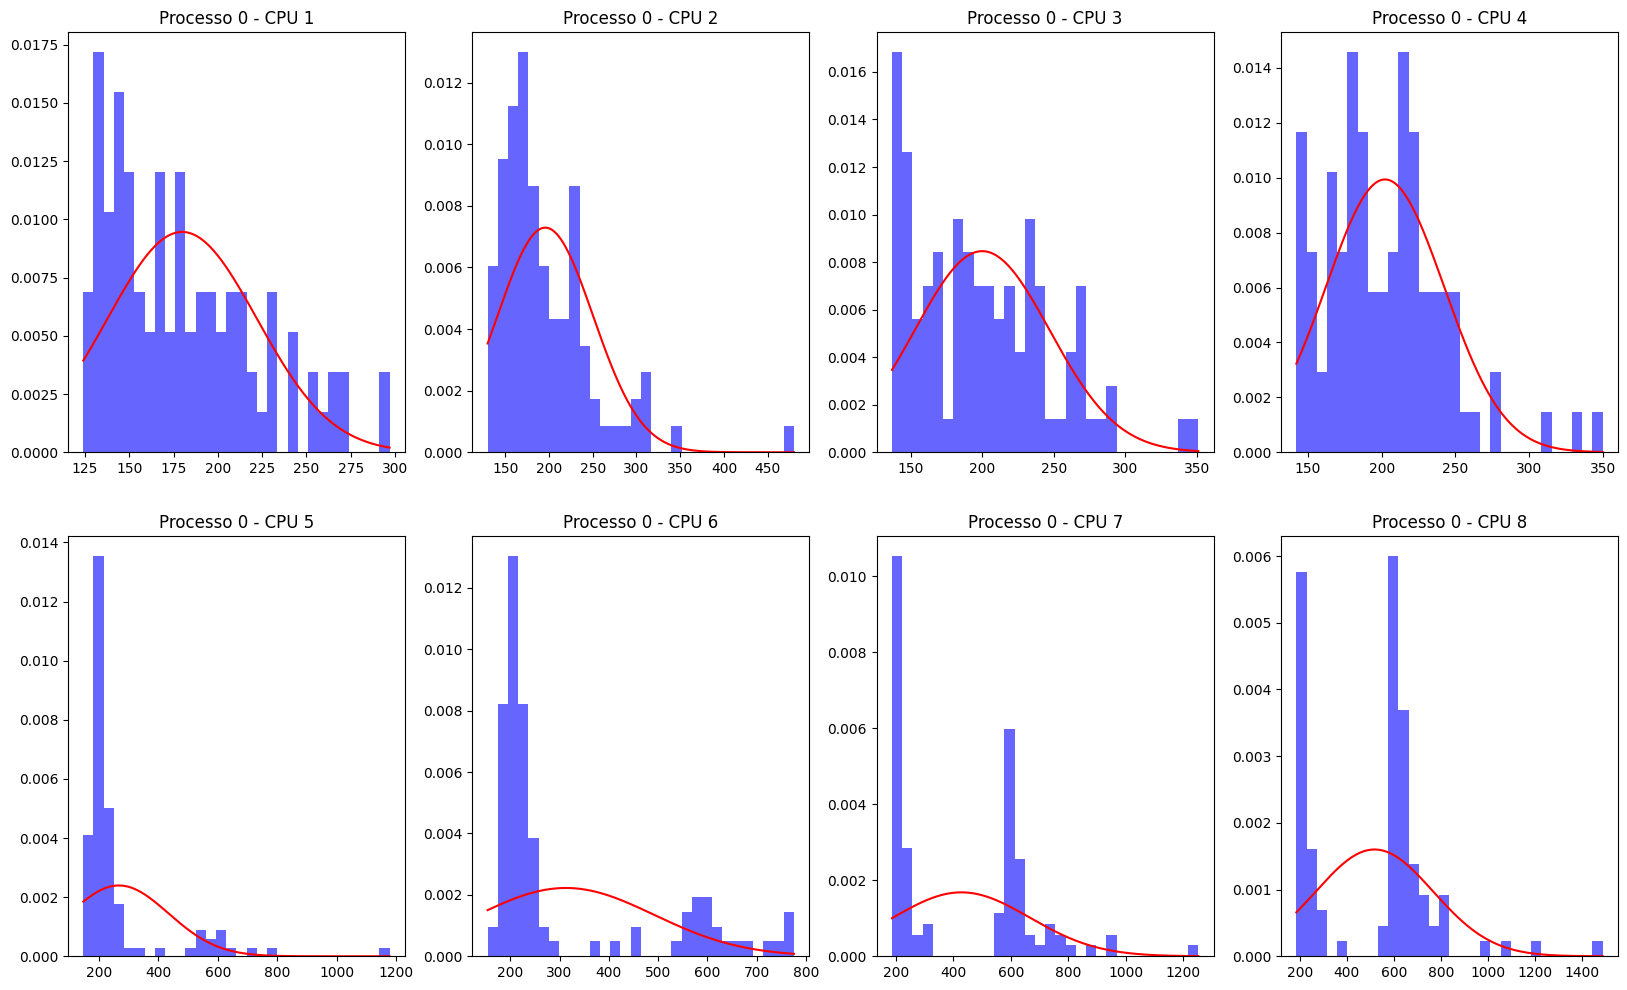

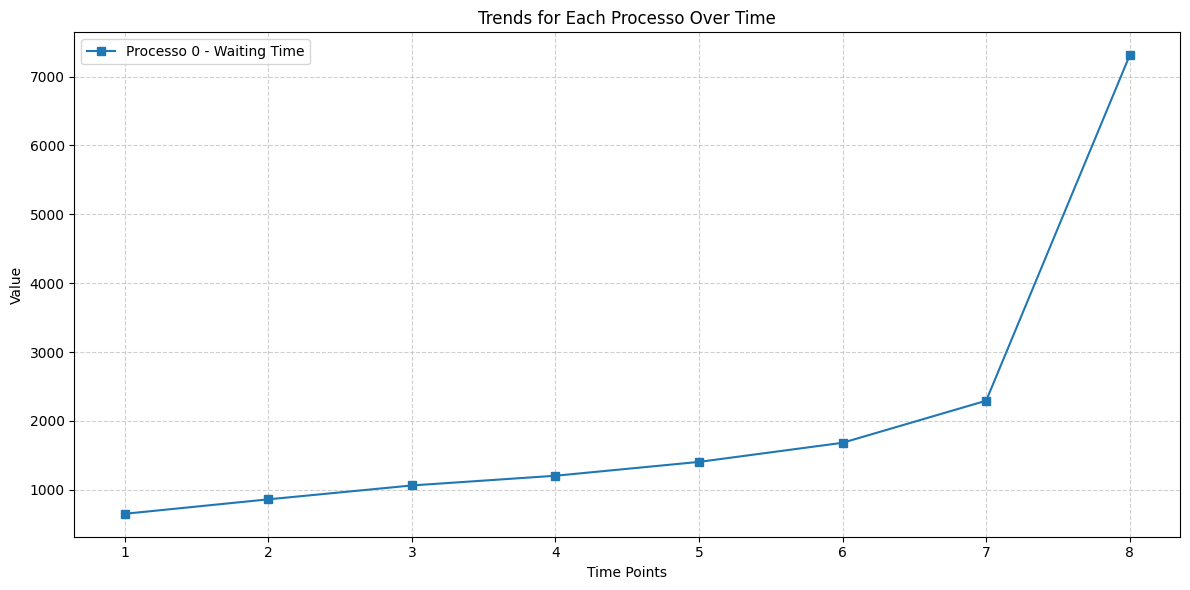

100000000 0
100000000 0


In [15]:
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import norm

def filter(dados):
    dados = np.array(dados)

    # dados = dados[(dados >= 400) & (dados <= 2250)] # Remove outliers no olho kkkkkkkkkkk

    # Cálculo da média e do desvio padrão
    media = np.mean(dados)
    desvio_padrao = np.std(dados)

    # Definindo o threshold (exemplo: 3 desvios padrão)
    limite_inferior = media - 3 * desvio_padrao
    limite_superior = media + 3 * desvio_padrao

    # Filtrando os dados para remover outliers
    filter_data = dados[(dados >= limite_inferior) & (dados <= limite_superior)]

    return filter_data


fig_normal, axs = plt.subplots(2, 4, figsize=(20, 12))

def normal(dados, title, ax):

    filter_data = filter(dados)

    # Cálculo da média e do desvio padrão
    media = np.mean(filter_data)
    desvio_padrao = np.std(filter_data)

    print(min(filter_data),"-", max(filter_data), media)

    # Geração do eixo x
    x = np.linspace(min(filter_data), max(filter_data), 1000)

    # Cálculo da densidade de probabilidade para cada valor de x
    densidade = norm.pdf(x, media, desvio_padrao)

    # Plot dos dados e da curva
    ax.hist(filter_data, bins=30, density=True, alpha=0.6, color='blue', label="Histograma dos Dados")
    ax.plot(x, densidade, color='red', label="Curva Normal Ajustada")
    ax.set_title(title)
    # ax.xlabel("Valores")
    # ax.ylabel("Densidade de Probabilidade")
    # ax.legend()
    # ax.show()




# 

cores = 8

all_data = {}

min_cpu_time = 100000000
max_cpu_time = 0

min_waiting_time = 100000000
max_waiting_time = 0

for core_c in range(cores):
    # Analisar apenas pelo numero de cores
    data = extract_values_from_file(f"out/{core_c + 1}/process.log")

    for process, value in data.items():
        normal(value["waiting_times"], f"Processo {process} - CPU {core_c + 1}", axs[core_c // 4][core_c % 4])

        if process not in all_data:
            all_data[process] = {"cpu_times": [], "waiting_times": [], "timestamps": []}

        all_data[process]["cpu_times"].append(np.mean(filter(value["cpu_times"])))
        all_data[process]["waiting_times"].append(np.mean(filter(value["waiting_times"])))
        all_data[process]["timestamps"].append(np.mean(filter(value["timestamps"])))

        continue

        cpu_time = 0
        waiting_time = 0
        timestamp = 0

        size = len(value["cpu_times"])

        for i in range(size):

            cpu_time += value["cpu_times"][i]
            waiting_time += value["waiting_times"][i]
            timestamp += value["timestamps"][i]

            min_cpu_time = min(min_cpu_time, value["cpu_times"][i])
            max_cpu_time = max(max_cpu_time, value["cpu_times"][i])

            min_waiting_time = min(min_waiting_time, value["waiting_times"][i])
            max_waiting_time = max(max_waiting_time, value["waiting_times"][i])
        
        cpu_time /= size
        waiting_time /= size
        timestamp /= size

        if process not in all_data:
            all_data[process] = {"cpu_times": [], "waiting_times": [], "timestamps": []}

        all_data[process]["cpu_times"].append(cpu_time)
        all_data[process]["waiting_times"].append(waiting_time)
        all_data[process]["timestamps"].append(timestamp)




# Plotar grafico
plt.figure(figsize=(12, 6))

cores_n = [i + 1 for i in range(cores)]

waiting_times = []

for process, value in all_data.items():
    waiting_times.append(value["waiting_times"])

    # plt.plot(cores_n, value["cpu_times"], label=f"Processo {process} - CPU Time", marker='o')
    plt.plot(cores_n, value["waiting_times"], label=f"Processo {process} - Waiting Time", marker='s')
    # plt.plot(cores_n, value["timestamps"], label=f"Processo {process} - Timestamp", marker='^')


plt.xlabel("Time Points")
plt.ylabel("Value")
plt.title("Trends for Each Processo Over Time")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(min_cpu_time, max_cpu_time)
print(min_waiting_time, max_waiting_time)